In [1]:
suppressMessages(library(tidyverse))
suppressMessages(library(parallel))
suppressMessages(library(Seurat))
suppressMessages(library(patchwork))
suppressMessages(library(Matrix))
suppressMessages(library(viridis))
suppressMessages(library(cowplot))
suppressMessages(library(ggsci))
suppressMessages(library(pheatmap))
suppressMessages(library(RColorBrewer))
suppressMessages(library(reshape2))
suppressMessages(library(LSD))
suppressMessages(library(readxl))
suppressMessages(library(ggrepel))
suppressMessages(library(harmony))
suppressMessages(library(scrattch.hicat))
options(future.globals.maxSize= 891289600 * 16)

In [2]:
cotex_dir='/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/1012_compare_to_cortex/data/'
cotex_10=readRDS(paste0(cotex_dir,'cortex_10.rds'))
cotex_24=readRDS(paste0(cotex_dir,'cortex_24.rds'))
cotex_7A=readRDS(paste0(cotex_dir,'cortex_7A.rds'))
cotex_F1=readRDS(paste0(cotex_dir,'cortex_F1.rds'))
cotex_TE=readRDS(paste0(cotex_dir,'cortex_TE.rds'))
cotex_V1=readRDS(paste0(cotex_dir,'cortex_V1.rds'))


In [3]:
cotex_10
cotex_24
cotex_7A
cotex_F1
cotex_TE
cotex_V1

An object of class Seurat 
21970 features across 18709 samples within 1 assay 
Active assay: RNA (21970 features, 0 variable features)

An object of class Seurat 
21970 features across 33406 samples within 1 assay 
Active assay: RNA (21970 features, 0 variable features)

An object of class Seurat 
21970 features across 12257 samples within 1 assay 
Active assay: RNA (21970 features, 0 variable features)

An object of class Seurat 
21970 features across 9112 samples within 1 assay 
Active assay: RNA (21970 features, 0 variable features)

An object of class Seurat 
21970 features across 33136 samples within 1 assay 
Active assay: RNA (21970 features, 0 variable features)

An object of class Seurat 
21970 features across 23009 samples within 1 assay 
Active assay: RNA (21970 features, 0 variable features)

In [4]:
cotex_10_sst=subset(cotex_10,SubClass=='IN-SST')
cotex_24_sst=subset(cotex_24,SubClass=='IN-SST')
cotex_7A_sst=subset(cotex_7A,SubClass=='IN-SST')
cotex_TE_sst=subset(cotex_TE,SubClass=='IN-SST')
cotex_F1_sst=subset(cotex_F1,SubClass=='IN-SST')
cotex_V1_sst=subset(cotex_V1,SubClass=='IN-SST')


In [5]:
readdir='/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/3area_compare_1225/3area_data/'
insu = readRDS('/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/Insular_renew_1016/batch_normalize_renew_240115/dif_res_anno/final_anno/46cl_240122_Cluster_Supercluster_res11.rds')
cla=readRDS('/home/liuyx/liuyuxuan/spa_seurat/cla/macaca/sn_0821_renew_batch3_all/batch_normalize_renew_0105/dif_res_anno1/final_anno/48cl_240118_merge_oligo_Cluster_Supercluster_res12.rds')


In [6]:
cla_sst=subset(cla,SuperCluster=='GABA_SST')
insu_sst=subset(insu,SuperCluster=='GABA_SST')


In [7]:

combineSeuratList = list(
    Insular=insu_sst,
    Cortex_10=cotex_10_sst,
    Cortex_24=cotex_24_sst,
    Cortex_7A=cotex_7A_sst,
    Cortex_TE=cotex_TE_sst,
    Cortex_F1=cotex_F1_sst,
    Cortex_V1=cotex_V1_sst,
    Clastrum=cla_sst
)
combineSeuratList = lapply(combineSeuratList, function(seurat) {
    seurat = SCTransform(
        seurat, assay="RNA",
        ncells=ncol(seurat[["RNA"]]), 
        variable.features.n=3000,
        return.only.var.genes = F,
        method = "glmGamPoi"
    ) %>%
        RunPCA(verbose = FALSE) %>%
        FindNeighbors(dims = 1:30) %>%
        FindClusters(verbose = FALSE) %>%
        RunUMAP(dims = 1:30)
    return(seurat)
})

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 18052 by 4151

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 4151 cells



  |======================================================================| 100%


Found 34 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 18052 genes



  |======================================================================| 100%


Computing corrected count matrix for 18052 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 47.74531 secs

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT

Computing nearest neighbor graph

Computing SNN

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
15:52:45 UMAP embedding parameters a = 0.9922 b = 1.112

15:52:45 Read 4151 rows and found 30 numeric columns

15:52:45 Using Annoy for neighbor search, n_neighbors = 30

15:52:45 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:52:46 Wr

  |======================================================================| 100%


Second step: Get residuals using fitted parameters for 11898 genes



  |======================================================================| 100%


Computing corrected count matrix for 11898 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 8.96764 secs

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT

Computing nearest neighbor graph

Computing SNN

15:53:14 UMAP embedding parameters a = 0.9922 b = 1.112

15:53:14 Read 576 rows and found 30 numeric columns

15:53:14 Using Annoy for neighbor search, n_neighbors = 30

15:53:14 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:53:15 Writing NN index file to temp file /tmp/RtmpYew0f3/file11d8317e4e0b4

15:53:15 Searching Annoy index using 1 thread, search_k = 3000

15:53:15 Annoy recall = 100%

15:53:16 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

15:53:18 Initializing from n

  |======================================================================| 100%


Found 37 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 14587 genes



  |======================================================================| 100%


Computing corrected count matrix for 14587 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 23.09545 secs

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT

Computing nearest neighbor graph

Computing SNN

15:53:52 UMAP embedding parameters a = 0.9922 b = 1.112

15:53:52 Read 1767 rows and found 30 numeric columns

15:53:52 Using Annoy for neighbor search, n_neighbors = 30

15:53:52 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:53:53 Writing NN index file to temp file /tmp/RtmpYew0f3/file11d83115e1bd6

15:53:53 Searching Annoy index using 1 thread, search_k = 3000

15:53:53 Annoy recall = 100%

15:53:54 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

15:53:57 Initializing from

  |======================================================================| 100%


Second step: Get residuals using fitted parameters for 8504 genes



  |======================================================================| 100%


Computing corrected count matrix for 8504 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 5.085582 secs

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT

Computing nearest neighbor graph

Computing SNN

15:54:09 UMAP embedding parameters a = 0.9922 b = 1.112

15:54:09 Read 165 rows and found 30 numeric columns

15:54:09 Using Annoy for neighbor search, n_neighbors = 30

15:54:09 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:54:09 Writing NN index file to temp file /tmp/RtmpYew0f3/file11d837b2d2956

15:54:09 Searching Annoy index using 1 thread, search_k = 3000

15:54:09 Annoy recall = 100%

15:54:10 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

15:54:13 Initializing from 

  |======================================================================| 100%


Found 48 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 14350 genes



  |======================================================================| 100%


Computing corrected count matrix for 14350 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 23.47953 secs

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT

Computing nearest neighbor graph

Computing SNN

15:54:47 UMAP embedding parameters a = 0.9922 b = 1.112

15:54:47 Read 1839 rows and found 30 numeric columns

15:54:47 Using Annoy for neighbor search, n_neighbors = 30

15:54:47 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:54:47 Writing NN index file to temp file /tmp/RtmpYew0f3/file11d832fb23ca5

15:54:47 Searching Annoy index using 1 thread, search_k = 3000

15:54:47 Annoy recall = 100%

15:54:49 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

15:54:51 Initializing from

  |======================================================================| 100%


Second step: Get residuals using fitted parameters for 11869 genes



  |======================================================================| 100%


Computing corrected count matrix for 11869 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 6.647839 secs

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT

Computing nearest neighbor graph

Computing SNN

15:55:06 UMAP embedding parameters a = 0.9922 b = 1.112

15:55:06 Read 255 rows and found 30 numeric columns

15:55:06 Using Annoy for neighbor search, n_neighbors = 30

15:55:06 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:55:06 Writing NN index file to temp file /tmp/RtmpYew0f3/file11d83ebe5fe2

15:55:06 Searching Annoy index using 1 thread, search_k = 3000

15:55:06 Annoy recall = 100%

15:55:07 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

15:55:10 Initializing from n

  |======================================================================| 100%


Second step: Get residuals using fitted parameters for 12890 genes



  |======================================================================| 100%


Computing corrected count matrix for 12890 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 11.93285 secs

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT

Computing nearest neighbor graph

Computing SNN

15:55:27 UMAP embedding parameters a = 0.9922 b = 1.112

15:55:27 Read 816 rows and found 30 numeric columns

15:55:27 Using Annoy for neighbor search, n_neighbors = 30

15:55:27 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:55:27 Writing NN index file to temp file /tmp/RtmpYew0f3/file11d8362859b2b

15:55:27 Searching Annoy index using 1 thread, search_k = 3000

15:55:27 Annoy recall = 100%

15:55:28 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

15:55:31 Initializing from 

  |======================================================================| 100%


Found 67 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 16555 genes



  |======================================================================| 100%


Computing corrected count matrix for 16555 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 50.35101 secs

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT

Computing nearest neighbor graph

Computing SNN

15:56:40 UMAP embedding parameters a = 0.9922 b = 1.112

15:56:41 Read 3945 rows and found 30 numeric columns

15:56:41 Using Annoy for neighbor search, n_neighbors = 30

15:56:41 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:56:41 Writing NN index file to temp file /tmp/RtmpYew0f3/file11d835a89dba6

15:56:41 Searching Annoy index using 1 thread, search_k = 3000

15:56:42 Annoy recall = 100%

15:56:44 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

15:56:46 Initializing from

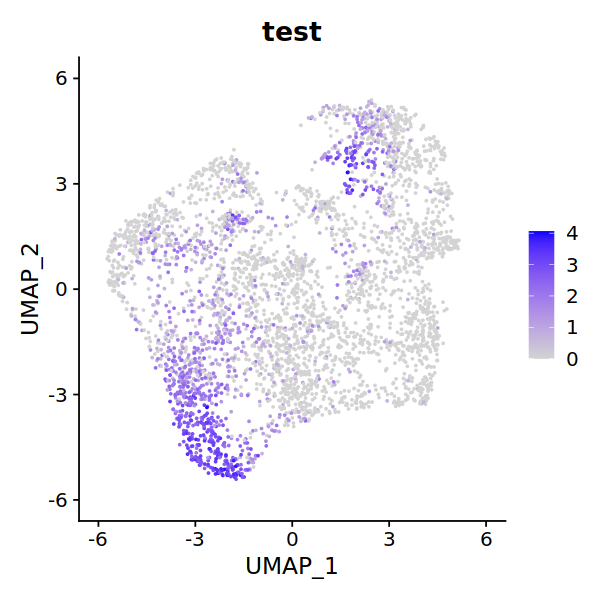

In [27]:
FeaturePlot(cla_sst, features = classMarkerTop,raster=FALSE)+ggtitle('test')


In [24]:
cla_sst=combineSeuratList$Clastrum
ins_sst=combineSeuratList$Insular
cotex_10_sst=combineSeuratList$Cortex_10
cotex_24_sst=combineSeuratList$Cortex_24
cotex_F1_sst=combineSeuratList$Cortex_F1
cotex_TE_sst=combineSeuratList$Cortex_TE
cotex_V1_sst=combineSeuratList$Cortex_V1
cotex_7A_sst=combineSeuratList$Cortex_7A
classMarkerTop = c('NPY')
options(repr.plot.width=20, repr.plot.height=10)


In [37]:
wt1=ncol(cotex_10)/9112
wt2=ncol(cotex_24)/9112
wt3=ncol(cotex_7A)/9112
wt4=ncol(cotex_F1)/9112
wt5=ncol(cotex_TE)/9112
wt6=ncol(cotex_V1)/9112
wt7=ncol(insu)/9112
wt8=ncol(cla)/9112


nm10=round(ncol(cotex_10_sst)/wt1)
nm24=round(ncol(cotex_24_sst)/wt2)
nm7a=round(ncol(cotex_7A_sst)/wt3)
nmf1=round(ncol(cotex_F1_sst)/wt4)
nmte=round(ncol(cotex_TE_sst)/wt5)
nmv1=round(ncol(cotex_V1_sst)/wt6)
nmin=round(ncol(ins_sst)/wt7)
nmcla=round(ncol(cla_sst)/wt8)


cla_sst$aba='1'
ins_sst$aba='1'
cotex_10_sst$aba='1'
cotex_24_sst$aba='1'
cotex_F1_sst$aba='1'
cotex_TE_sst$aba='1'
cotex_V1_sst$aba='1'
cotex_7A_sst$aba='1'

Idents(cla_sst)='aba'
Idents(ins_sst)='aba'
Idents(cotex_10_sst)='aba'
Idents(cotex_24_sst)='aba'
Idents(cotex_F1_sst)='aba'
Idents(cotex_TE_sst)='aba'
Idents(cotex_V1_sst)='aba'
Idents(cotex_7A_sst)='aba'

cla_sst1=subset(cla_sst,downsample=nmcla)
ins_sst1=subset(ins_sst,downsample=nmin)
cotex_10_sst1=subset(cotex_10_sst,downsample=nm10)
cotex_24_sst1=subset(cotex_24_sst,downsample=nm24)
cotex_F1_sst1=subset(cotex_F1_sst,downsample=nmf1)
cotex_TE_sst1=subset(cotex_TE_sst,downsample=nmte)
cotex_V1_sst1=subset(cotex_V1_sst,downsample=nmv1)
cotex_7A_sst1=subset(cotex_7A_sst,downsample=nm7a)


Warning message:
“Could not find NPY in the default search locations, found in RNA assay instead”


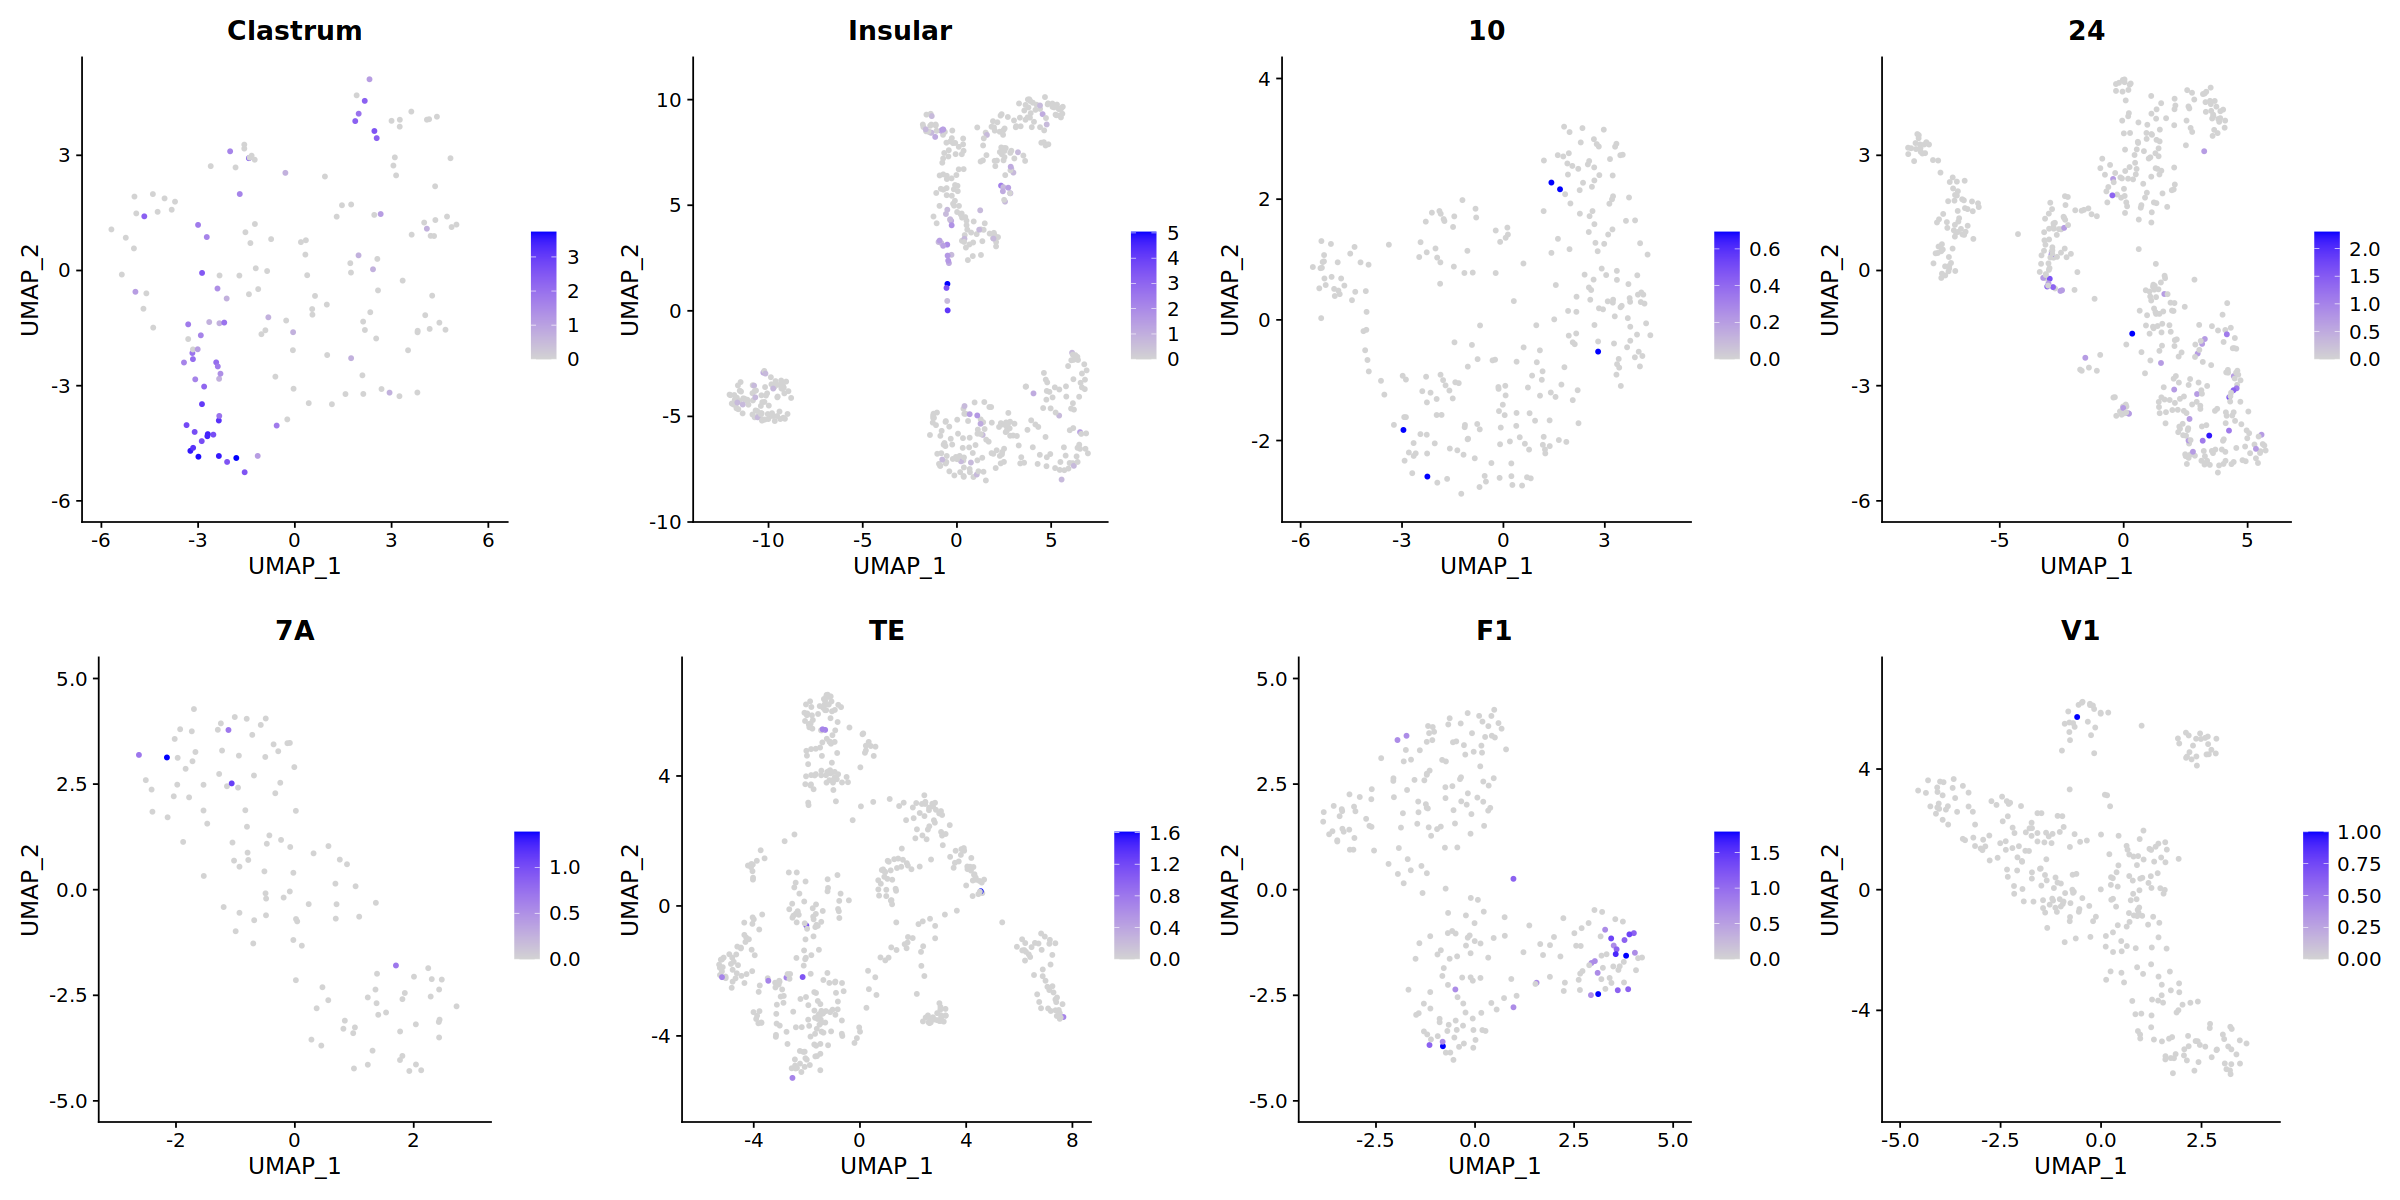

In [38]:
gp=plot_grid(FeaturePlot(cla_sst1, features = classMarkerTop,raster=FALSE)+ggtitle('Clastrum'),
          FeaturePlot(ins_sst1, features = classMarkerTop,raster=FALSE)+ggtitle('Insular'),
         FeaturePlot(cotex_10_sst1, features = classMarkerTop,raster=FALSE)+ggtitle('10'),
          FeaturePlot(cotex_24_sst1, features = classMarkerTop,raster=FALSE)+ggtitle('24'),
          FeaturePlot(cotex_7A_sst1, features = classMarkerTop,raster=FALSE)+ggtitle('7A'),
          FeaturePlot(cotex_TE_sst1, features = classMarkerTop,raster=FALSE)+ggtitle('TE'),
          FeaturePlot(cotex_F1_sst1, features = classMarkerTop,raster=FALSE)+ggtitle('F1'),
          FeaturePlot(cotex_V1_sst1, features = classMarkerTop,raster=FALSE)+ggtitle('V1'),
          nrow=2
         )
gp


In [39]:
pdf("/home/liuyx/liuyuxuan/spa_seurat/cla/fig_1206/area_compare_240118/sst_npy.pdf",width=20,height=10)
gp
dev.off()



png 
  2

In [50]:
df_sum=data.frame()

for(i in c(1:8)){df=as.data.frame(combineSeuratList[[i]]@assays$RNA@counts['NPY',])
colnames(df)='num'
ratio=nrow(df[df$num>0,,drop=F])/nrow(df)
df_sum=rbind(df_sum,c(ratio,names(combineSeuratList[i])))}
colnames(df_sum)=c('ratio','area')
df_sum$ratio=as.numeric(df_sum$ratio)



In [56]:
df_sum$area=gsub('Cortex_','',df_sum$area)
df_sum$area=gsub('Clastrum','Claustrum',df_sum$area)
df_sum$area=factor(df_sum$area,levels = c('Claustrum','Insular',
                                         '10','24','7A','TE','F1','V1'))


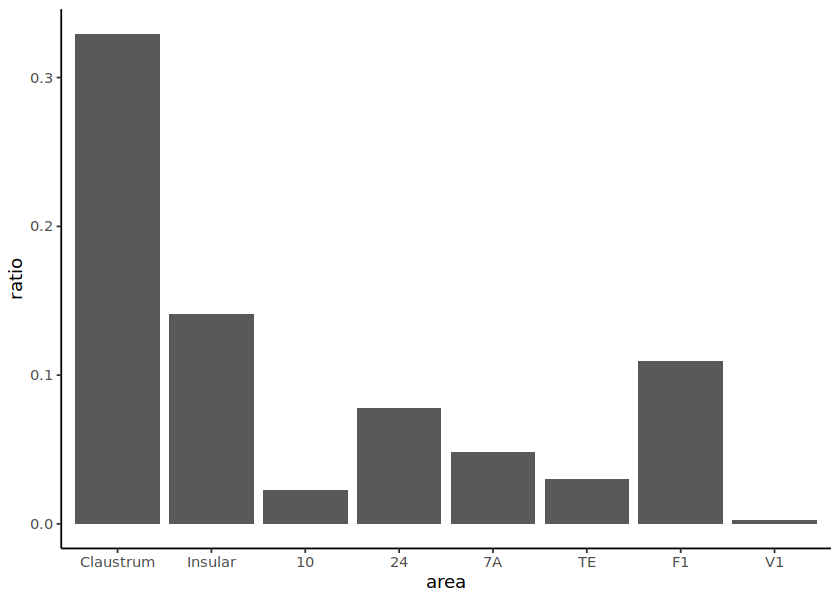

In [58]:

options(repr.plot.width=7, repr.plot.height=5)
gp2=ggplot(data = df_sum, aes(x=area,y=ratio)) +
 geom_bar(stat = "identity", position = "stack")+theme_classic()
gp2

In [59]:
pdf("/home/liuyx/liuyuxuan/spa_seurat/cla/fig_1206/area_compare_240118/bar.pdf",width=7,height=5)
gp2
dev.off()


png 
  2

In [62]:
pdf("/home/liuyx/liuyuxuan/spa_seurat/cla/fig_1206/area_compare_240118/sst_npy.pdf",width=20,height=10)
gp
dev.off()


png 
  2